# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr,epsilon=1e-07,)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.3749 - accuracy: 0.5127 - val_loss: 1.5245 - val_accuracy: 0.4600
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.3667 - accuracy: 0.5150 - val_loss: 1.5004 - val_accuracy: 0.4751
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 2s 46us/step - loss: 1.0656 - accuracy: 0.6259 - val_loss: 1.4464 - val_accuracy: 0.5016
Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0605 - accuracy: 0.6285 - val_loss: 1.3702 - val_accuracy: 0.5277
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0538 - accuracy: 0.6323 - val_loss: 1.4116 - val_accuracy: 0.5129
Epoch 50/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.0470 - accuracy: 0.6326 - val_loss: 1.4013 - val_accuracy: 0.5136
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 3s 57us/step - loss: 1.2739 - accuracy: 0.5562 - val_loss: 1.3939 - val_accuracy: 0.5084
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.2689 - accuracy: 0.5589 - val_loss: 1.3853 - val_accuracy: 0.5020
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.2660 - accuracy: 0.5594 - val_loss: 1.3841 - val_accuracy: 0.5088
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2613 - accuracy: 0.5616 - val_loss: 1.3698 - val_accuracy: 0.5122
Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2580 - accuracy: 0.5628 - val_loss: 1.3997 - val_accuracy: 0.5000
Epoch 50/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2532 - accuracy: 0.5644 - val_loss: 1.3935 - val_accuracy: 0.5046
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type

50000/50000 [==============================] - 2s 45us/step - loss: 1.6620 - accuracy: 0.4217 - val_loss: 1.6720 - val_accuracy: 0.4183
Epoch 44/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6601 - accuracy: 0.4224 - val_loss: 1.6702 - val_accuracy: 0.4160
Epoch 45/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6583 - accuracy: 0.4226 - val_loss: 1.6685 - val_accuracy: 0.4182
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6564 - accuracy: 0.4229 - val_loss: 1.6664 - val_accuracy: 0.4182
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6546 - accuracy: 0.4239 - val_loss: 1.6647 - val_accuracy: 0.4192
Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6527 - accuracy: 0.4247 - val_loss: 1.6632 - val_accuracy: 0.4201
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6511 - accuracy: 0.4262 - val_loss: 1.6615

50000/50000 [==============================] - 2s 45us/step - loss: 2.0010 - accuracy: 0.3027 - val_loss: 2.0010 - val_accuracy: 0.2974
Epoch 42/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9992 - accuracy: 0.3035 - val_loss: 1.9993 - val_accuracy: 0.2989
Epoch 43/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9975 - accuracy: 0.3043 - val_loss: 1.9976 - val_accuracy: 0.2988
Epoch 44/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.9958 - accuracy: 0.3045 - val_loss: 1.9960 - val_accuracy: 0.2996
Epoch 45/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9942 - accuracy: 0.3055 - val_loss: 1.9944 - val_accuracy: 0.2997
Epoch 46/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9926 - accuracy: 0.3059 - val_loss: 1.9928 - val_accuracy: 0.2999
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9910 - accuracy: 0.3066 - val_loss: 1.9913

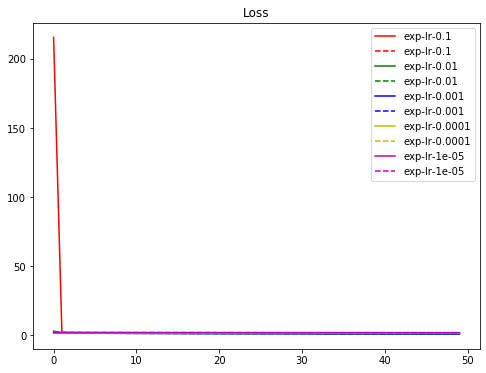

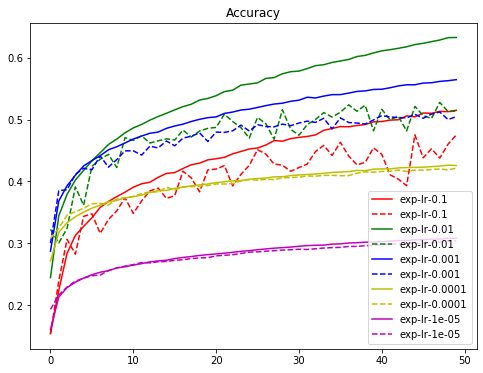

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()